In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

os.listdir()
train = pd.read_csv('animalshel_train.csv')
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [100]:
# dealing with missing data

train.apply(lambda x: sum(x.isnull()), axis=0)

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

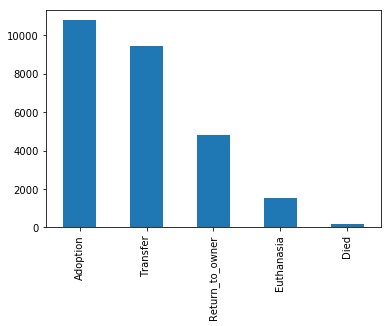

In [19]:
train.OutcomeType.value_counts().plot.bar()
plt.show()

In [27]:
print(train.dtypes)
print()
cols = train.columns
for col in cols:
    print(col, ':', train[col].nunique())
    

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

AnimalID : 26729
Name : 6374
DateTime : 22918
OutcomeType : 5
OutcomeSubtype : 16
AnimalType : 2
SexuponOutcome : 5
AgeuponOutcome : 44
Breed : 1380
Color : 366


In [50]:
from sklearn.preprocessing import OneHotEncoder
type_onehotencoder = OneHotEncoder()
type_1hot = type_onehotencoder.fit_transform(train[['AnimalType']])
print(type_1hot.toarray())
print(type_onehotencoder.categories_)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[array(['Cat', 'Dog'], dtype=object)]


In [83]:
type_df = pd.DataFrame(data=type_1hot.toarray(), columns=['AnimalType_' + cat for cat in type_onehotencoder.categories_[0]])
train_i1 = pd.concat([train,type_df], axis=1).drop(['AnimalType'], axis=1)

In [84]:
train_i1.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,AnimalType_Cat,AnimalType_Dog
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0.0,1.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1.0,0.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Neutered Male,2 years,Pit Bull Mix,Blue/White,0.0,1.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,1.0,0.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0.0,1.0
